<a href="https://colab.research.google.com/github/StevenDavid04/fall2023-datascience/blob/main/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [444]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [445]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [446]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [447]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [448]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [449]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)


In [450]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [451]:
#X.shape

In [452]:
#x = X[3,0,:,:]

In [453]:
#x = x.reshape(x.shape[0]*x.shape[1],1)

In [454]:
#x = x.reshape(28,28)

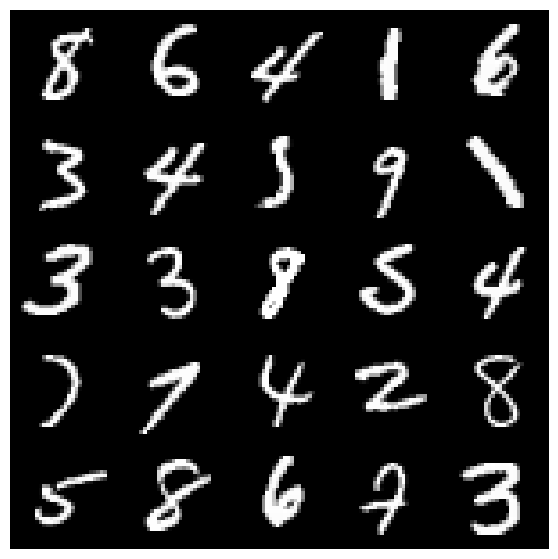

In [455]:
montage_plot(X[125:150,0,:,:])

In [456]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


In [457]:
X = X.T

In [458]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [459]:
x = X[:,0:64]

In [460]:
M = GPU(np.random.rand(10,784))

In [461]:
m = np.random.standard_normal((10,784))

In [462]:
y = M@x

In [464]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.0981166660785675
0.12045000493526459
0.1359499990940094
0.13979999721050262
0.1445000022649765
0.16899999976158142
0.17865000665187836
0.18691666424274445
0.1901833415031433
0.20520000159740448
0.21293333172798157
0.2179500013589859
0.21871666610240936
0.21916666626930237
0.23938333988189697
0.24735000729560852
0.26313334703445435
0.273250013589859
0.27728334069252014
0.28146666288375854
0.2860499918460846
0.2878499925136566
0.2943333387374878
0.29918333888053894
0.30000001192092896
0.3097333312034607
0.3292500078678131
0.33211666345596313
0.34146666526794434
0.34816667437553406
0.3536166846752167
0.3572833240032196
0.35805001854896545
0.36053332686424255
0.3619333505630493
0.3661166727542877
0.37191668152809143
0.3765166699886322
0.37843334674835205
0.3816666603088379
0.38179999589920044
0.38761666417121887
0.3878333270549774
0.38875001668930054
0.39008334279060364
0.3919833302497864
0.39266666769981384
0.39393332600593567
0.3957666754722595
0.396366685628891
0.4062666594982147
0.41